<a href="https://colab.research.google.com/github/Neil-Cardoz/ClassFiles/blob/main/SML_Dscision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import all thhe modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score


In [33]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV_FILES/iphone_purchase_records.csv")

In [34]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [35]:
# Convert Gender to number
Label_encoder = LabelEncoder()
df['Gender'] = Label_encoder.fit_transform(df['Gender']) # MALE -> 0, FEMALE-> 1

In [36]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [37]:
df['Purchase Iphone'].value_counts()

,count
Purchase Iphone,
0,257
1,143


In [38]:
X = df.drop('Purchase Iphone', axis=1)
y = df['Purchase Iphone']

# Step 3 : Split data into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [41]:
print(X_train.shape)
print(X_test.shape)

(320, 3)
(80, 3)


In [42]:
print(y_train.shape)
print(y_test.shape)

(320,)
(80,)


# Step 4 : Fit into Decision Tree Classifier

In [43]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc}")
print("Confusion Matrix :\n")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.9125
Confusion Matrix :

[[47  5]
 [ 2 26]]
Classification Report :

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



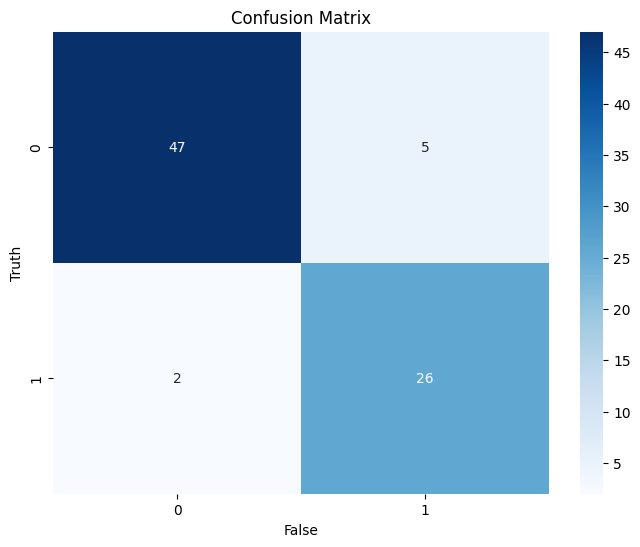

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('False')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# This gives us probabilities that each test sample belongs to class 1 (Purchase)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

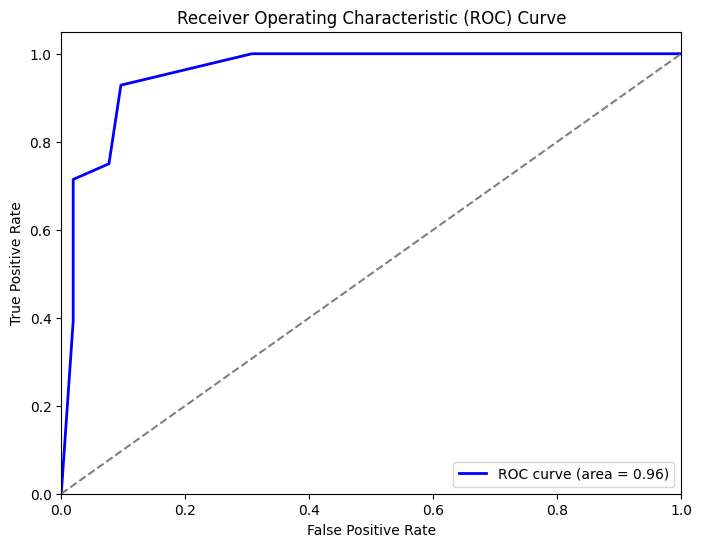

In [49]:
# ROC - AUC curve
fpr,tpr,_ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
print("Roc_Auc: ", roc_auc_score(y_test, y_pred_proba))


Roc_Auc:  0.9584478021978022
